<a href="https://colab.research.google.com/github/Hesh0629/Keras-Study/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
train=pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
test=pd.read_csv('/content/drive/MyDrive/titanic_test.csv')
total_data=[train,test] #이렇게 리스트안에 넣어서 한번에 값 처리 할 수 있도록 함

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Embarked Cabin에 데이터 유실값 존재

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', figsize=(10,5))

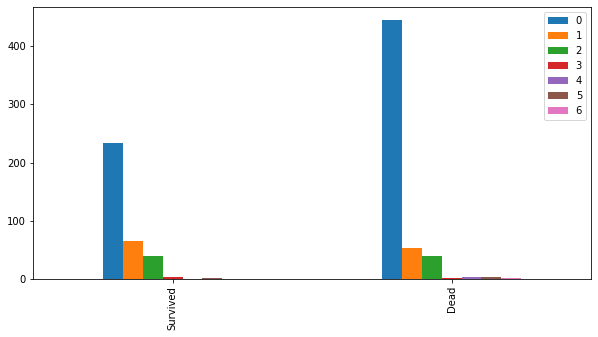

In [ ]:
bar_chart('Parch')

원래는 Cabin번호 그나마 남아있던거 끄집어 내야하지만 내일로...

In [ ]:
train.drop('Name',axis=1,inplace=True)
train.drop('Ticket',axis=1,inplace=True)
train.drop('Cabin',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [ ]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


string으로 된 성별을 0,1로 각각 매칭

In [ ]:
sex_mapping = {"male": 0, "female":1} #우선 dict로 저장
for dataset in total_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

능지 문제로 age와 fare의 빈 부분들을 평균값으로 대체

In [ ]:
nan_age=(train.sum()[4]+test.sum()[4])/(train.shape[0]+test.shape[0])
nan_age
nan_fare=(train.sum()[6]+test.sum()[6])/(train.shape[0]+test.shape[0])
print(nan_fare)

11.60927242169595


In [ ]:
for dataset in total_data:
    dataset['Age']=dataset['Age'].fillna(value=nan_age)

In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


하나 남아있던 Embarked의 NaN 빈자리도 대체하는데 S가 제일 많아서 S로 대체

In [ ]:
for dataset in total_data:
    dataset['Embarked']=dataset['Embarked'].fillna(value='S')
em_mapping = {"S": 0, "C":1, "Q":2}
for dataset in total_data:
    dataset['Embarked'] = dataset['Embarked'].map(em_mapping)

In [ ]:
for dataset in total_data:
  dataset['Fare'] = dataset['Fare'].fillna(value=nan_fare)

In [ ]:
print(test.dtypes)

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object


**이제 딥러닝 set에 주입준비 완료**

In [ ]:
train_label=train['Survived'].to_numpy()
train_data=train.loc[:,'Pclass':].to_numpy()

test_data=test.loc[:,'Pclass':].to_numpy()

In [ ]:
from keras import optimizers
from keras import initializers
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(train_data.shape[1],),kernel_initializer=initializers.he_normal))
model.add(layers.Dense(16,activation='relu',kernel_initializer=initializers.he_normal))
model.add(layers.Dense(16,activation='relu',kernel_initializer=initializers.he_normal))
model.add(layers.Dense(1,activation='sigmoid',kernel_initializer=initializers.he_normal))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
train_data.shape

(891, 7)

In [ ]:
val_data=train_data[:124]
train_data=train_data[124:]
val_label=train_label[:124]
train_label=train_label[124:]

In [ ]:
history=model.fit(train_data,train_label,batch_size=2,epochs=50,validation_data=(val_data,val_label),verbose=0)

In [ ]:
asdf=history.history
np.max(asdf['acc'])

0.8044328689575195

In [ ]:
model.evaluate(train_data,train_label,batch_size=1) #배치사이즈는 상관이 없다

767/767 [==============================] - 1s 912us/step - loss: 0.4277 - acc: 0.8266


[0.42773404717445374, 0.8265971541404724]

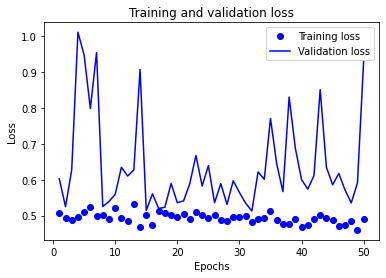

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() #범례 그리기

plt.show()

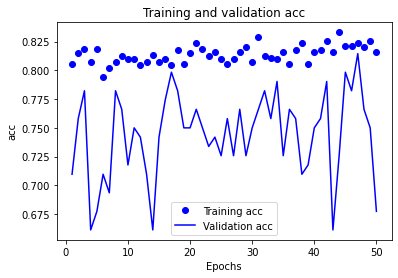

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['acc']
val_loss = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend() #범례 그리기

plt.show()

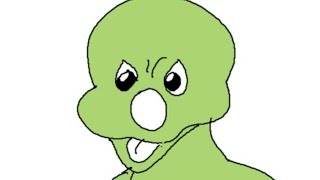

**이...이게 뭐노....**